#Part 1: Import the Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
training = "/content/titanic_train.csv"

tF = pd.read_csv(training)

In [4]:
tF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Part 2: Plot The Data

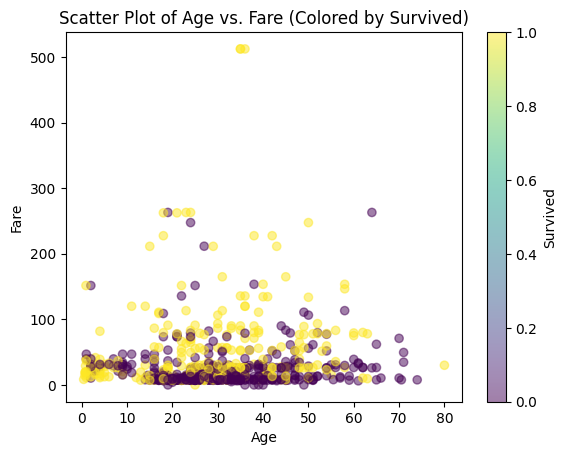

In [9]:
# Cell 4
# Plotting data (for example, Age vs. Fare with color based on Survived)
plt.scatter(tF['Age'], tF['Fare'], c=tF['Survived'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare (Colored by Survived)')
plt.colorbar(label='Survived')
plt.show()

#Part 3: Perform Simple Linear Regression on the "Survived" feature column

In [11]:
# Cell 5
# Importing necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Prepare the data
X = tF[['Age', 'Fare']]
y = tF['Survived']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression()

In [12]:
# Cell 6
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.6480446927374302
Confusion Matrix:
[[100   5]
 [ 58  16]]


Questions:

**1. Many variable pairs present correlation close to zero. What does that mean?**

It may be that the other correlated attributes that has closer to zero (i.e weight and PIQ in males) has no correlation in pertaining to a certain IQ.


**2. Why separate the genders?**

So that it helps to determine which certain genders has certain attributes that can be correlated with indicated IQs.


**3. What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.**

In male, most of having high heatmap range were PIQ, VIQ and FSIQ.
While females have higher heatmap range in weight.

It may seems viable in males to have such range since it may be possible to relate IQ and brain. But there's no other indications if having higher MRI_Count(brain size) is correlated to those IQs.

Females on the other hand has their own physique so may be weight relates to MRI_Count but doesn't give another indication of correlation between MRI_Count and their IQs.